## Step 1: Data Collection

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('btc_2015_2024.csv')

print("--- Initial Data Head ---")
print(df.head())
print("\n--- Data Info ---")
print(df.info())



--- Initial Data Head ---
         date        open        high         low       close      volume  \
0  2015-01-02  314.079010  315.838989  313.565002  315.032013   7860650.0   
1  2015-01-03  314.846008  315.149994  281.082001  281.082001  33054400.0   
2  2015-01-04  281.145996  287.230011  257.612000  264.195007  55629100.0   
3  2015-01-05  265.084015  278.341003  265.084015  274.473999  43962800.0   
4  2015-01-06  274.610992  287.553009  272.696014  286.188995  23245700.0   

        rsi_7      rsi_14       cci_7      cci_14      sma_50      ema_50  \
0  100.000000  100.000000  -66.666667  -66.666667  314.640503  314.648333   
1    1.938583    2.096744 -100.000000 -100.000000  303.454336  303.009081   
2    1.235506    1.375421 -110.693896 -110.693896  293.639503  292.715747   
3   21.462825   19.523695  -76.487357  -76.487357  289.806403  288.769813   
4   38.272356   34.350787  -37.070244  -37.070244  289.203501  288.295540   

      sma_100     ema_100      macd   bollinger 

## Step 2: Data Exploration & Analysis (EDA)

### Basic Info of Dateset

In [3]:
print("\nDataset Info:")
display(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3406 entries, 0 to 3405
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            3406 non-null   object 
 1   open            3406 non-null   float64
 2   high            3406 non-null   float64
 3   low             3406 non-null   float64
 4   close           3406 non-null   float64
 5   volume          3406 non-null   float64
 6   rsi_7           3406 non-null   float64
 7   rsi_14          3406 non-null   float64
 8   cci_7           3406 non-null   float64
 9   cci_14          3406 non-null   float64
 10  sma_50          3406 non-null   float64
 11  ema_50          3406 non-null   float64
 12  sma_100         3406 non-null   float64
 13  ema_100         3406 non-null   float64
 14  macd            3406 non-null   float64
 15  bollinger       3406 non-null   float64
 16  TrueRange       3406 non-null   float64
 17  atr_7           34

None

In [4]:
# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
date              0
open              0
high              0
low               0
close             0
volume            0
rsi_7             0
rsi_14            0
cci_7             0
cci_14            0
sma_50            0
ema_50            0
sma_100           0
ema_100           0
macd              0
bollinger         0
TrueRange         0
atr_7             0
atr_14            0
next_day_close    0
dtype: int64


In [5]:
# Check for duplicates and remove them
duplicates = df.duplicated().sum()
print(f"\nRow Duplicated: {duplicates}")


Row Duplicated: 0


In [6]:
# Summary Statistics (Raw Prices)
print("\n--- Summary Statistics (Raw Data) ---")
print(df.describe())


--- Summary Statistics (Raw Data) ---
               open          high           low         close        volume  \
count   3406.000000   3406.000000   3406.000000   3406.000000  3.406000e+03   
mean   16492.625341  16877.348454  16080.656277  16509.984552  1.768334e+10   
std    17807.583857  18232.358118  17335.693731  17821.420606  1.932729e+10   
min      176.897003    211.731003    171.509995    178.102997  7.860650e+06   
25%     1429.217529   1478.617523   1423.639953   1462.137451  5.828465e+08   
50%     9027.951172   9216.074219   8808.764160   9044.665528  1.373602e+10   
75%    27266.747070  27790.822754  26836.931641  27292.176758  2.822673e+10   
max    73079.375000  73750.070313  71334.093750  73083.500000  3.509679e+11   

             rsi_7       rsi_14        cci_7       cci_14        sma_50  \
count  3406.000000  3406.000000  3406.000000  3406.000000   3406.000000   
mean     54.008653    53.734240    12.663339    18.526839  16036.270960   
std      18.499728    14

### Time-Series Trend Analysis

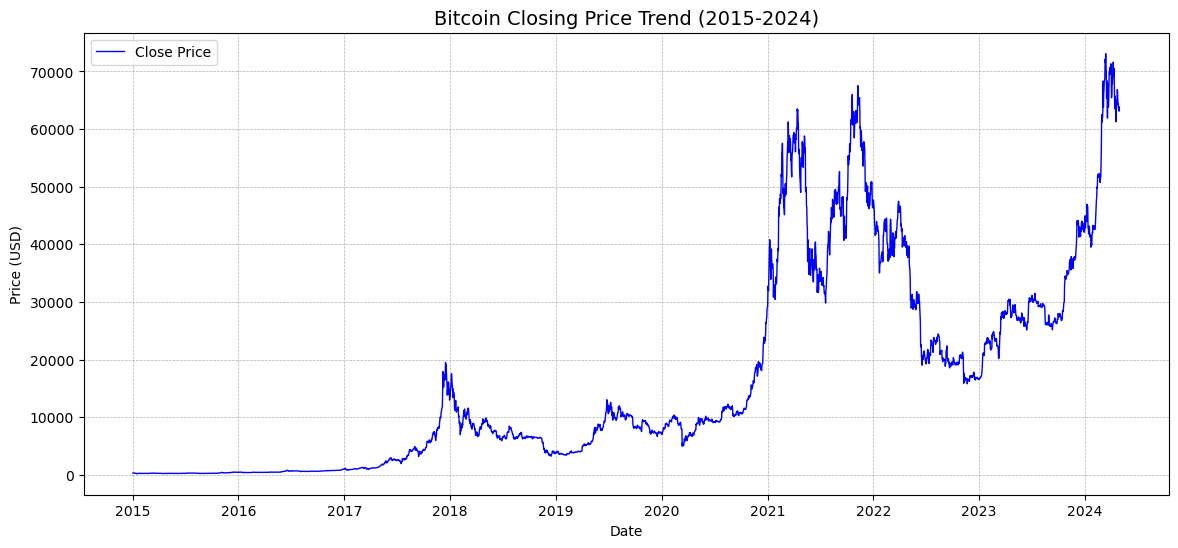

In [ ]:
# Plot 1: Closing Price Trend
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

# # Filter the DataFrame to include data from 2014 to 2020
# df_filtered = df[(df['date'].dt.year >= 2014) & (df['date'].dt.year <= 2022)].copy()

fig, ax = plt.subplots(figsize=(14, 6))

ax.plot(df['date'], df['close'], label='Close Price', color='blue', linewidth=1)

# Set the title with the updated date range
ax.set_title('Bitcoin Closing Price Trend (2015-2024)', fontsize=14)
ax.set_xlabel('Date')
ax.set_ylabel('Price (USD)')

# --- Format x-axis to label each year ---
# Set major ticks to be at the beginning of each year
ax.xaxis.set_major_locator(mdates.YearLocator())
# Format the major tick labels to show just the year (e.g., "2014")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


## Step 3:  Data Cleaning

In [9]:
# Convert 'date' to datetime objects
# format='%d/%m/%Y %H:%M' handles "01/03/2022 0:00"
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

# Sort by date (Oldest -> Newest) is CRITICAL for time-series
df = df.sort_values('date').reset_index(drop=True)

# Drop irrelevant columns
# 'unix' is redundant with date, 'symbol' is constant
df = df.drop(['next_day_close'], axis=1)

display(df.head())

,date,open,high,low,close,volume,rsi_7,rsi_14,cci_7,cci_14,sma_50,ema_50,sma_100,ema_100,macd,bollinger,TrueRange,atr_7,atr_14
0,2015-01-02,314.079010,315.838989,313.565002,315.032013,7860650.0,100.000000,100.000000,-66.666667,-66.666667,314.640503,314.648333,314.640503,314.644418,0.017568,314.640503,2.273987,4.193073,4.275997
1,2015-01-03,314.846008,315.149994,281.082001,281.082001,33054400.0,1.938583,2.096744,-100.000000,-100.000000,303.454336,303.009081,303.454336,303.232458,-1.030403,303.454336,34.067993,15.719617,14.951008
2,2015-01-04,281.145996,287.230011,257.612000,264.195007,55629100.0,1.235506,1.375421,-110.693896,-110.693896,293.639503,292.715747,293.639503,293.178382,-2.091487,293.639503,29.618011,20.033779,19.034849
3,2015-01-05,265.084015,278.341003,265.084015,274.473999,43962800.0,21.462825,19.523695,-76.487357,-76.487357,289.806403,288.769813,289.806403,289.286389,-2.215008,289.806403,14.145996,18.468441,17.907070
4,2015-01-06,274.610992,287.553009,272.696014,286.188995,23245700.0,38.272356,34.350787,-37.070244,-37.070244,289.203501,288.295540,289.203501,288.744005,-1.746686,289.203501,14.856995,17.613461,17.300126


## Step 4: Feature Engineering

### Target Variable Derivation 

In [15]:
TARGET_HORIZON = 7  # predict the trends one week ahead (1 - up, 0 - down)

future_price = df['close'].shift(-TARGET_HORIZON)
current_price = df['close']

# Use percentage change for more balanced classes
price_change_pct = ((future_price - current_price) / current_price) * 100

# Threshold: predict UP if price increases by >0.5%
df['Target'] = (price_change_pct > 0.5).astype(int)

Bullish Days: 1787 (52.47%)
Bearish Days: 1619 (47.53%)


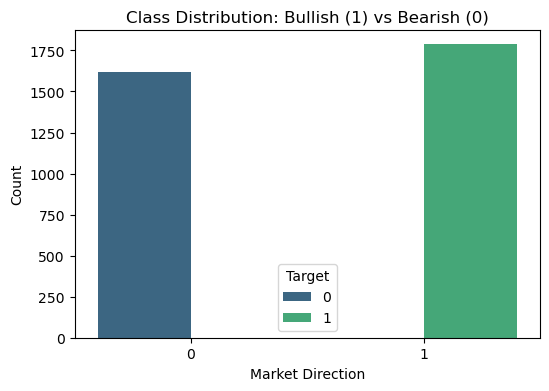

In [17]:
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x='Target', data=df, hue = 'Target', palette='viridis')
plt.title('Class Distribution: Bullish (1) vs Bearish (0)', fontsize=12)
plt.xlabel('Market Direction')
plt.ylabel('Count')
# Add labels
bullish_count = df['Target'].value_counts()[1]
bearish_count = df['Target'].value_counts()[0]
print(f"Bullish Days: {bullish_count} ({(bullish_count/len(df))*100:.2f}%)")
print(f"Bearish Days: {bearish_count} ({(bearish_count/len(df))*100:.2f}%)")
plt.show()

- Daily Return (% change)

In [18]:
df['Daily_Return'] = df['close'].pct_change() # 

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


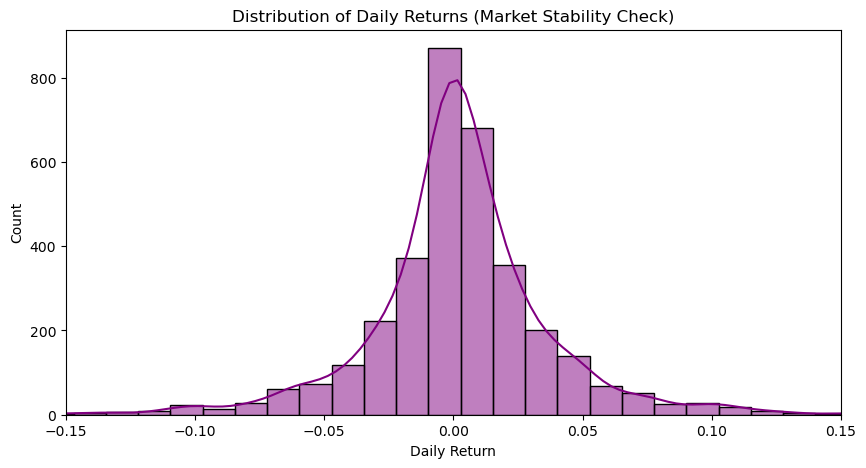

In [19]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Daily_Return'], bins=50, kde=True, color='purple') # type: ignore
plt.title('Distribution of Daily Returns (Market Stability Check)', fontsize=12)
plt.xlabel('Daily Return')
plt.xlim(-0.15, 0.15) # Zoom in to ignore extreme outlier wicks
plt.show()

- Volatility Features

In [20]:
df['High_Low_Spread'] = df['high'] - df['low'] # High-Low Spread (Intraday Volatility)
df['Close_Open_Spread'] = df['close'] - df['open'] # Close-Open Spread (Day's Momentum)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'High-Low Spread (USD)')

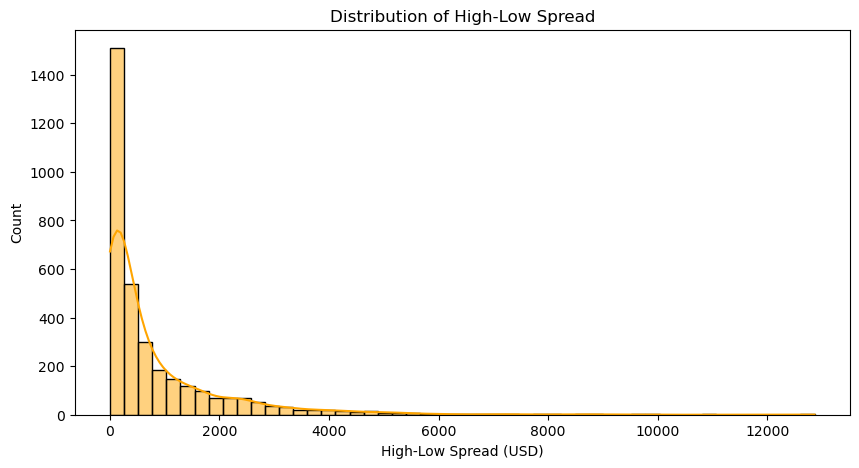

In [22]:
# plot
plt.figure(figsize=(10, 5))
sns.histplot(df['High_Low_Spread'], bins=50, kde=True, color='orange') # type: ignore
plt.title('Distribution of High-Low Spread', fontsize=12)
plt.xlabel('High-Low Spread (USD)')

- Moving Averages (Trend Indicators)

In [21]:
df['MA_7'] = df['close'].rolling(window=7).mean()
df['MA_30'] = df['close'].rolling(window=30).mean()

# Drop rows with NaN values created by shifting/rolling (first 30 rows and last 1 row)
df = df.dropna()

In [25]:
df.to_csv('btc_processed.csv', index=False)